In [1]:

import numpy as np 
import pandas as pd    

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv('health care diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.shape

(768, 9)

In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### A.Data Exploration

#### 1.Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:

In [6]:
columns_with_value_0 = ['Glucose', 'BloodPressure',
                        'SkinThickness', 'Insulin', 'BMI']

In [7]:
def count_rows_with_value_0(columns, data):
    for column in columns:
        if column in data:
            sRows = data[data[column] == 0]
            print(column,' = ',len(sRows))


In [8]:
def check_nd_with_hist(data, columns):
    for column in columns:
        if column in data:
            plt.hist(data[column])
            print('Distribution of values in : ', column)
            plt.show()

#### 2.Visually explore these variables using histograms. Treat the missing values accordingly.

Distribution of values in :  Glucose


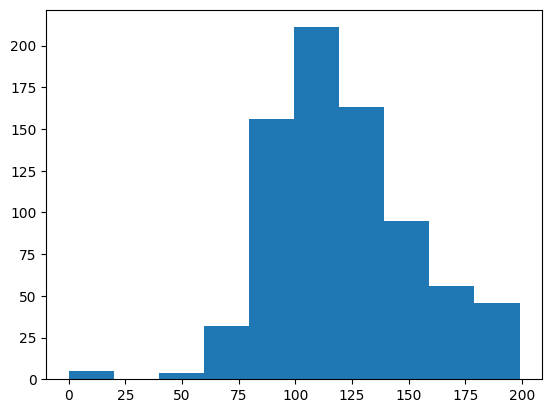

Distribution of values in :  BMI


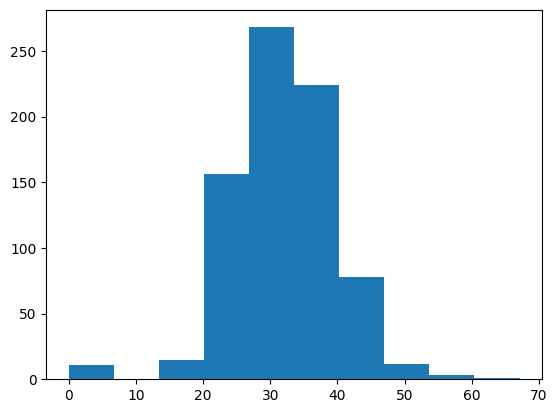

Distribution of values in :  SkinThickness


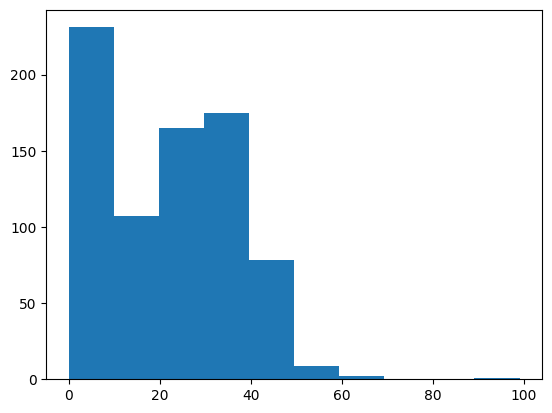

In [9]:
check_nd_with_hist(data, ['Glucose', 'BMI','SkinThickness'])


In [10]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
# data = data.drop(['SkinThickness', 'Insulin'], axis=1)

In [12]:
count_rows_with_value_0(columns=columns_with_value_0, data=data)

Glucose  =  5
BloodPressure  =  35
SkinThickness  =  227
Insulin  =  374
BMI  =  11


In [13]:
data[columns_with_value_0].mean()

Glucose          120.894531
BloodPressure     69.105469
SkinThickness     20.536458
Insulin           79.799479
BMI               31.992578
dtype: float64

In [14]:
def replace_0_with_mean(df, columns):
    for column in columns:
        if column in df:
            df[column].replace(0, df[column].mean(), inplace=True)
    return df 

In [15]:
data = replace_0_with_mean(
    data, ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin'])
# column_means = data[columns_with_value_0].mean()
# # data.fillna(column_means, inplace=True)
# data[data[columns_with_value_0] == 0].fill(column_means)
count_rows_with_value_0(columns=columns_with_value_0, data=data)




Glucose  =  0
BloodPressure  =  0
SkinThickness  =  0
Insulin  =  0
BMI  =  0


#### 3.There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables. 

Text(0.5, 1.0, 'Frequency Plot of Data Types in DataFrame')

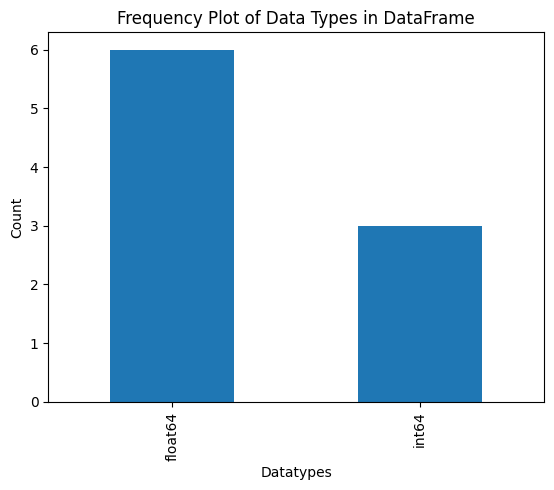

In [16]:
columns_dt = data.dtypes.value_counts()
columns_dt.plot(kind='bar')

plt.xlabel('Datatypes')
plt.ylabel('Count')
plt.title('Frequency Plot of Data Types in DataFrame')



#### 4.Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

In [17]:
def plot_val_count(df, columns):
    for column in columns:
        if column in df:
            plt.hist(df[column],histtype='stepfilled',bins=20)
            plt.xlabel('Values')
            plt.ylabel('Counts')
            plt.title(f'Occurence of values in {column}')
            plt.show()

In [18]:
positives = data[data['Outcome']==1]
positives.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
6,3,78.0,50.0,32.000000,88.000000,31.0,0.248,26,1
8,2,197.0,70.0,45.000000,543.000000,30.5,0.158,53,1


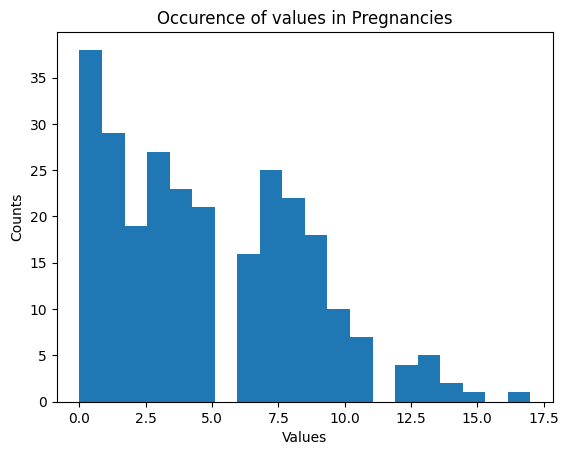

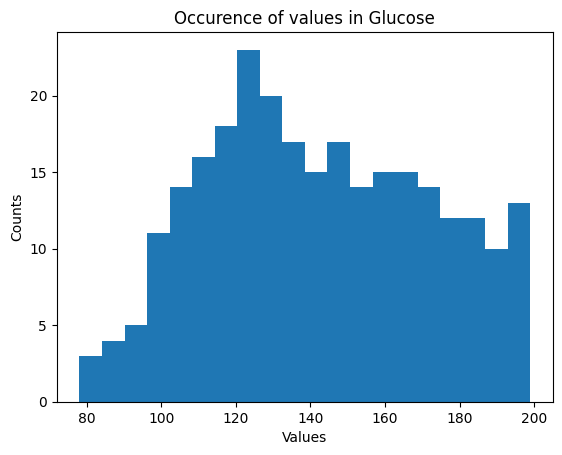

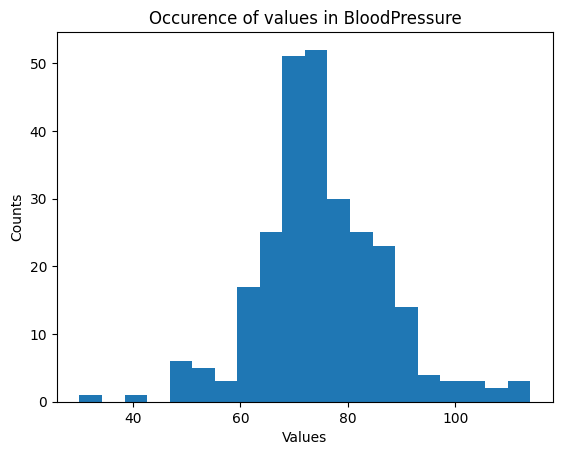

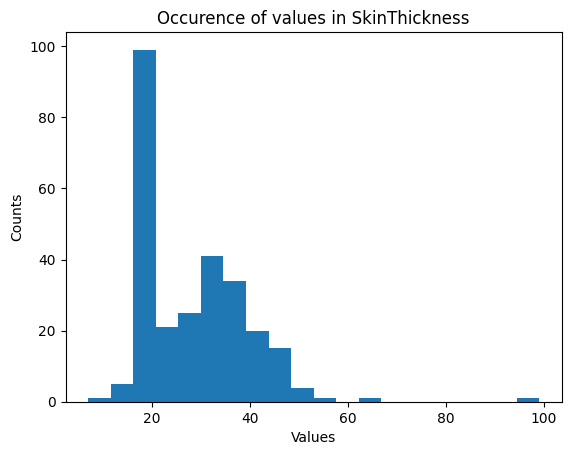

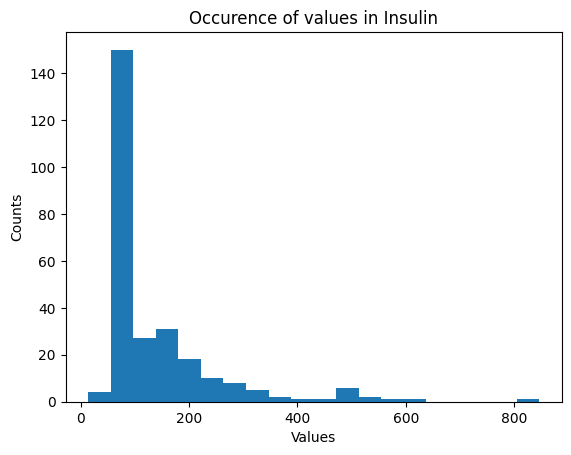

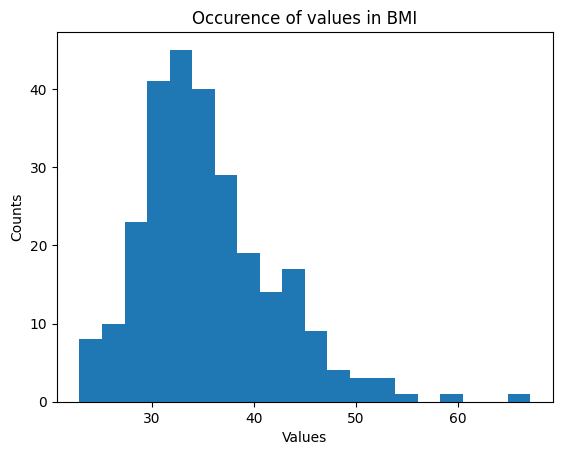

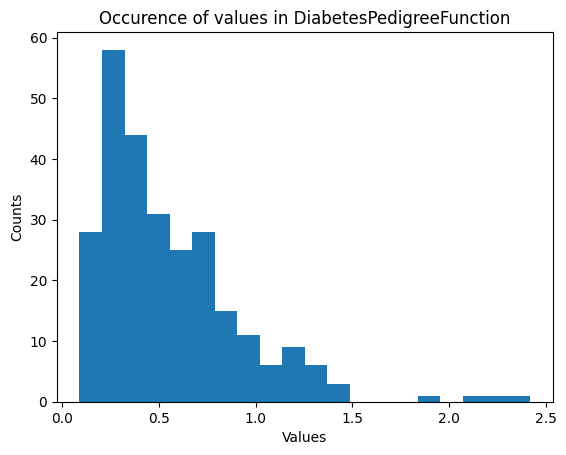

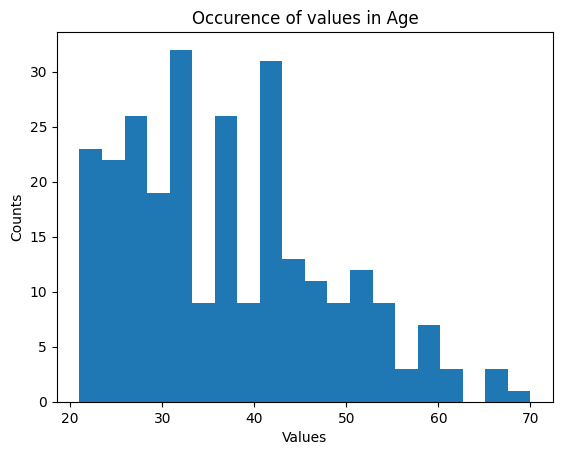

In [19]:
plot_val_count(positives,positives.columns.values[0:len(positives.columns.values)-1])

#### 5.Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

In [20]:
def scatter_plot_of_pairs(df, var1, var2):
    if var1 in df and var2 in df:
        sns.scatterplot(x=var1, y=var2, data=df,hue='Outcome')

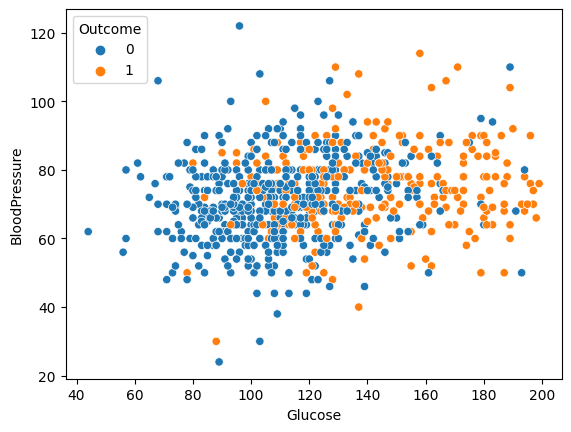

In [21]:
scatter_plot_of_pairs(data, 'Glucose', 'BloodPressure')

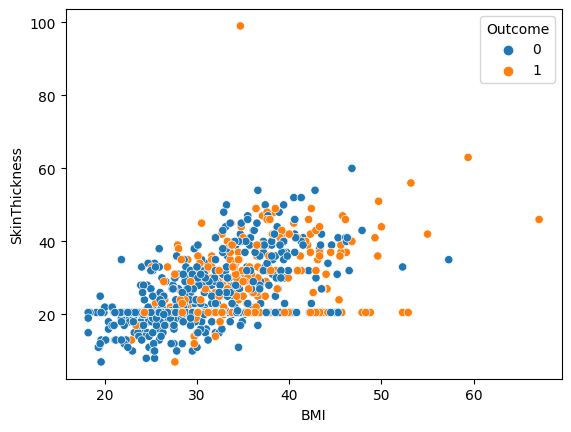

In [22]:
scatter_plot_of_pairs(data, 'BMI', 'SkinThickness')

#### 6.Perform correlation analysis. Visually explore it using a heat map.

<AxesSubplot: >

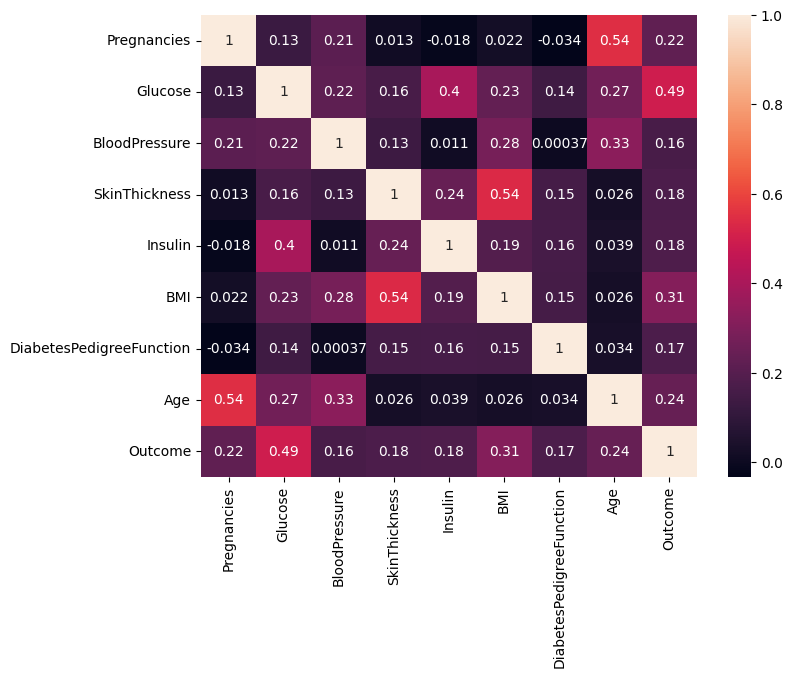

In [23]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=True)


In [24]:
# check corelation between two variable and p-value
# we can compare the corelation value with heatmap, bot are calculated with same method
stats.stats.pearsonr(data['Glucose'], data['BloodPressure'])

PearsonRResult(statistic=0.21966569657774093, pvalue=7.605765896409494e-10)

### Data Modeling

In [25]:
x = data.drop('Outcome', axis=1)
y = data['Outcome']

In [61]:
def prediction_with_diff_model(algos, x, y, random_state=42, test_size=0.2):
    x_train, x_test, y_train, y_test = train_test_split(
        x, y, random_state=42, test_size=0.2)
    for algo in algos:
        print('\n\n**********', algo, '**************')
        for i in range(2, 8):
            kf = KFold(n_splits=i, random_state=42, shuffle=True)
            cross_val = cross_val_score(
                algo, x_train, y_train, cv=kf, scoring='accuracy')
            print('\ncross val = ', cross_val,)
            print('cross_val_mean = ', cross_val.mean())
            print('Std. dev. = ', cross_val.std())
        
        # print('accuracy_score = ', round(accuracy_score(y_test, y_pred),4)*100)
        # print('Precision = ', round(precision_score(y_test, y_pred),4)*100)
        # print('Recall = ', round(recall_score(y_test, y_pred),4)*100)
        # tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        # print('tn = ', tn, ', fp = ', fp, ', fn = ', fn, ', tp = ', tp)
        
        algo.fit(x_train, y_train)
        test_accuracy = algo.score(x_test, y_test)
        print('test_accuracy', round(test_accuracy,4)*100)
        # print('predict probability', (algo.predict_proba(x_test) > 0.5).astype(int))


In [27]:
import xgboost as xgb

In [63]:
logReg = LogisticRegression()
knn = KNeighborsClassifier()
dtr = DecisionTreeClassifier()
rfc = RandomForestClassifier()
xgbCl = xgb.XGBClassifier(
    n_estimators=15,
    learning_rate=0.12,
    max_depth=3,
    # min_child_weight=1,
    # gamma=1
    )


models = [
    xgbCl,
    logReg,
    # knn,
    dtr,
    rfc,
    ]

prediction_with_diff_model(models, x, y)




********** XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.12, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=15, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) **************

cross val =  [0.7752443 0.752443 ]
cross_val_mean =  0.7638436482084691
Std. dev. =  0.01140065146579805

cross val =  [0.8        0.74634146 0.75980392]
cross_val_mean =  0.7687151283277539
Std. dev. =  0.02279425134470953